In [1]:
import os

In [2]:
!git clone https://github.com/resemble-ai/Resemblyzer.git
%cd Resemblyzer

Cloning into 'Resemblyzer'...
remote: Enumerating objects: 602, done.
remote: Total 602 (delta 0), reused 0 (delta 0), pack-reused 602
Receiving objects: 100% (602/602), 101.46 MiB | 48.44 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/Resemblyzer


In [3]:
ls

audio_data/                      LICENSE
demo01_similarity.py             plots/
demo02_diarization.py            README.md
demo03_projection.py             requirements_demos.txt
demo04_clustering.py             requirements_package.txt
demo05_fake_speech_detection.py  resemblyzer/
demo_utils.py                    setup.py


In [4]:
!pip install -r requirements_package.txt

     |████████████████████████████████| 66 kB 5.1 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72446 sha256=8b960753de8633c80639026237fa7d0f39b2a43047525f92b48bc0102918a821
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=7c8f7ff3c873b817db7a8264930f5699deb666d81727f57e1ef7eb35dff4d373
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built webrtcvad typing


In [1]:
%cd Resemblyzer

/content/Resemblyzer


In [2]:
!pip install -r requirements_demos.txt

     |████████████████████████████████| 86 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 57.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=b392071fee4e24eae236c859ce747897b3ba4c44496cd99471bd12d3dfddcd9d
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=966a49c64b0d12d6216b59a92453fb9b357a8a4f4063793cf39a89a47db8bebf
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [3]:
!pip install -e .

Obtaining file:///content/Resemblyzer
  Running setup.py develop for Resemblyzer


In [4]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file_path = '/content/conv1.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.03 seconds.
(2502, 256)


In [5]:
wav.shape

(2425920,)

In [6]:
cont_embeds.shape


(2502, 256)

In [7]:
wav_splits[2]

slice(1920, 27520, None)

#Note:
Sometimes the module might throw an error when you try to use an audio file having file extension different from wav, like mp3. In this case, you might need to convert your mp3 file to wav before using. You can use the below script (you will need to install pydub first)

In [ ]:

# from pydub import AudioSegment

# def mp3_to_wav(audio_file_path):
#     sound = AudioSegment.from_mp3(audio_file_path)
#     audio_file_path = audio_file_path.split('.')[0] + '.wav'
#     sound.export(audio_file_path, format="wav")
#     return audio_file_path

# audio_file_path = mp3_to_wav(audio_file_path)


In [8]:
!pip install spectralcluster

In [9]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    )

labels = clusterer.predict(cont_embeds)

In [10]:
labels.shape

(2502,)

In [11]:
import numpy as np
np.unique(labels)


array([0, 1])

In [12]:

def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [13]:
labelling

[('1', 0, 5.78),
 ('0', 5.78, 14.96),
 ('1', 14.96, 15.26),
 ('0', 15.26, 15.32),
 ('1', 15.32, 15.62),
 ('0', 15.62, 24.2),
 ('1', 24.2, 24.38),
 ('0', 24.38, 24.44),
 ('1', 24.44, 27.08),
 ('0', 27.08, 28.22),
 ('1', 28.22, 28.7),
 ('0', 28.7, 28.82),
 ('1', 28.82, 29.12),
 ('0', 29.12, 45.86),
 ('1', 45.86, 45.98),
 ('0', 45.98, 48.92),
 ('1', 48.92, 50.84),
 ('0', 50.84, 50.96),
 ('1', 50.96, 51.02),
 ('0', 51.02, 51.08),
 ('1', 51.08, 51.2),
 ('0', 51.2, 51.62),
 ('1', 51.62, 54.5),
 ('0', 54.5, 54.62),
 ('1', 54.62, 54.74),
 ('0', 54.74, 66.56),
 ('1', 66.56, 69.26),
 ('0', 69.26, 76.58),
 ('1', 76.58, 78.2),
 ('0', 78.2, 94.52),
 ('1', 94.52, 94.76),
 ('0', 94.76, 102.62),
 ('1', 102.62, 103.22),
 ('0', 103.22, 109.82),
 ('1', 109.82, 114.68),
 ('0', 114.68, 134.42),
 ('1', 134.42, 136.28),
 ('0', 136.28, 137.12),
 ('1', 137.12, 140.6),
 ('0', 140.6, 148.16),
 ('1', 148.16, 148.22),
 ('0', 148.22, 148.28),
 ('1', 148.28, 150.86)]

In [14]:
len(labelling)

43

In [15]:
cd ..

/content


In [16]:
ls

Audio/  conv1.wav  conv2.wav  Resemblyzer/  sample_data/


In [18]:
import os
c = 1
for i in labelling:
  os.system(f"ffmpeg -i conv1.wav -ss {i[1]} -t {i[2]} -acodec copy Audio/{c}.wav")
  print('done')
  c = c + 1

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
!rm -rf Audio/*

In [ ]:
# !ffmpeg -i conv1.wav -ss 0 -t 5.78 -acodec copy output.wav

In [19]:
len(os.listdir("Audio"))

43

In [20]:
!pip install SpeechRecognition
!pip install pydub


     |████████████████████████████████| 32.8 MB 65 kB/s 


In [22]:
from IPython.display import Audio
Audio("/content/conv1.wav",autoplay=True)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
import speech_recognition as sr
# from playsound import playsound
import time
r = sr.Recognizer()

for i in range(len(labelling)):
  Audio(f"Audio/{i+1}.wav",autoplay=True)
  time.sleep(1)

  hellow=sr.AudioFile(f'Audio/{i+1}.wav')
  with hellow as source:
      audio = r.record(source)
  try:
      s = r.recognize_google(audio)
      print(f"Speaker {labelling[i][0]}: {s}")
  except Exception as e:
      print("Exception: "+str(e))

Speaker 1: perfect.
Speaker 0: then I went up there in the summer and then we went you still went with rounds and Bobby for Wet 2 weeks Wednesday languages and quite big safari park that and we went to Bulawayo Harare and
Speaker 1: Safari box at and we went to Bulawayo Harare and Lake Kariba we stayed in the houseboat and we went to Victoria.
Speaker 0: sorry box at and we went to Bulawayo Harare and Lake Kariba we stayed in the houseboat and we went to Victoria.
Speaker 1: sorry box at and we went to Bulawayo Harare and Lake Kariba we stayed in the houseboat and we went to Victoria.
Speaker 0: dogs and we went to Bulawayo and Harare and Lake Kariba aside in the houseboat and we went to Victoria first two beds in the
Speaker 1: and we went to Victoria Falls a few eggs in it there was two beds in the bed which was a double bed and it was for alphabet as those two bands like which had which UK
Speaker 0: and we went to Victoria Falls a few eggs in it there was two beds in the bathroom w

KeyboardInterrupt: ignored

In [25]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import librosa

def play_audio(name):
  an4_audio = name
  sr = 16000
  signal, sr = librosa.load(an4_audio,sr=sr) 

  fig,ax = plt.subplots(1,1)
  fig.set_figwidth(20)
  fig.set_figheight(2)
  plt.plot(np.arange(len(signal)),signal,'gray')
  fig.suptitle('Reference merged an4 audio', fontsize=16)
  plt.xlabel('time (secs)', fontsize=18)
  ax.margins(x=0)
  plt.ylabel('signal strength', fontsize=16);
  a,_ = plt.xticks();plt.xticks(a,a/sr);

  IPython.display.Audio(an4_audio,autoplay=True)

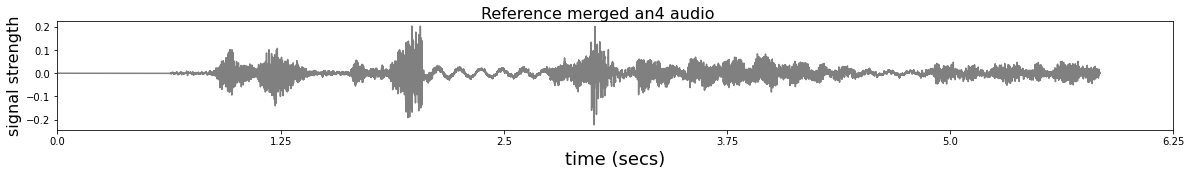

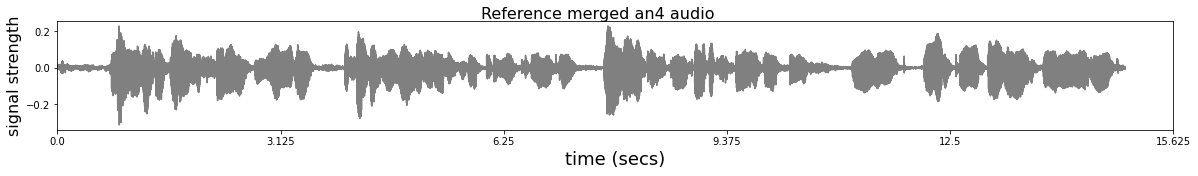

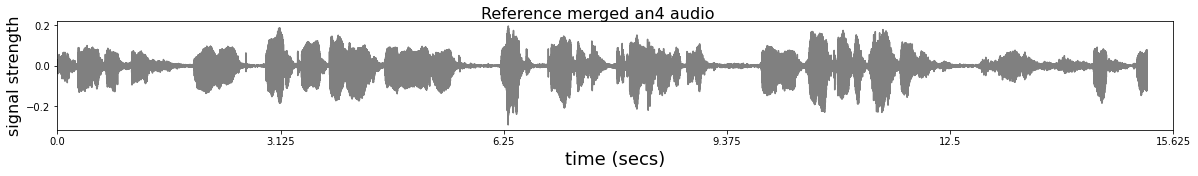

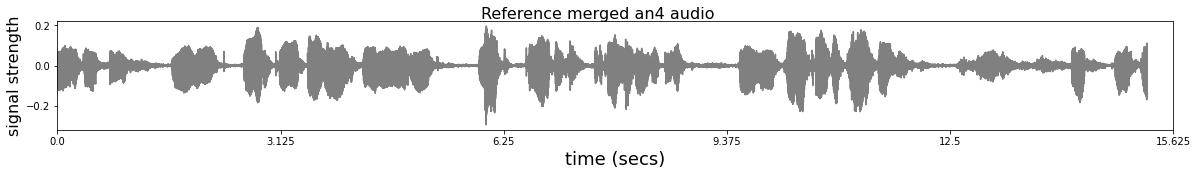

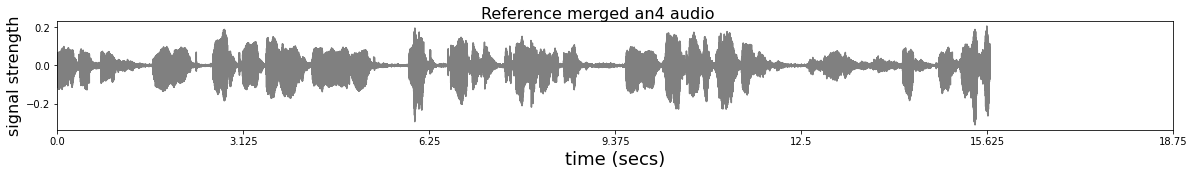

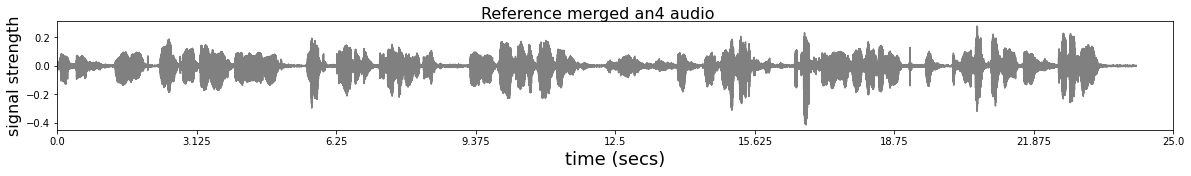

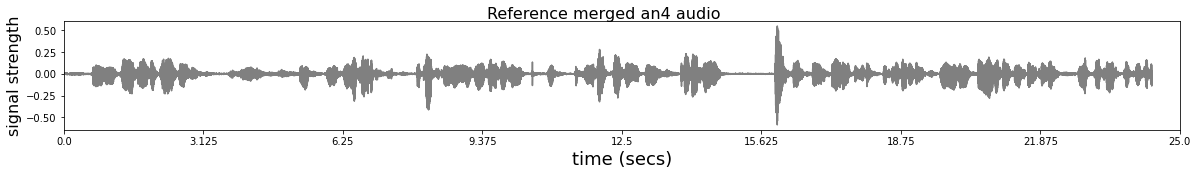

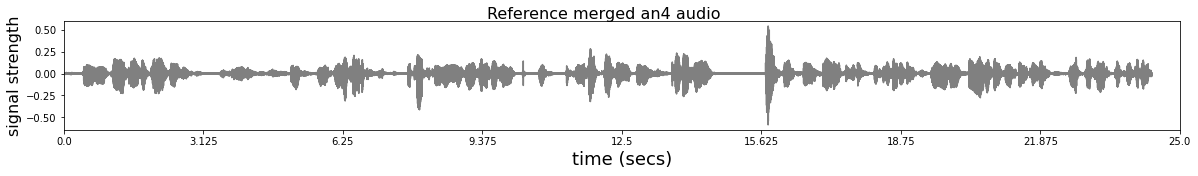

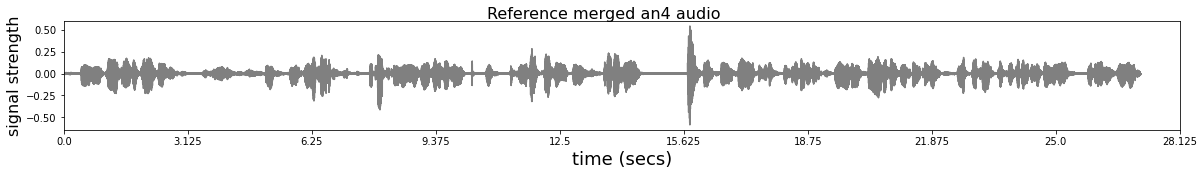

In [26]:
for i in range(1,10):
  play_audio(f"Audio/{i}.wav")